<a href="https://colab.research.google.com/github/behrepo/baharepo/blob/main/Code__MLP_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#    رابا استفاده از کتابخانه کراس دریافت و با یک مدل شبکه عصبی طبقه بندی میکندFashion-MNISTبرنامه یک مجموعه داده
import numpy as np # linear algebra .    کردن flat برای کار با دیتای تصویر و تبدیل به یک ماتریس و آرایه و نرمالایز و
import matplotlib.pyplot as plt # plotting library  برای مصور سازی ها ، نمایش 25 تصویر رندوم از مجمموعه دیتا
from keras.models import Sequential  # استفاده از مدل ترتیبی برای لایه ها
from keras.layers import Dense , Activation,  Dropout  # لایه های شبکه عصبی
from keras.optimizers import Adam ,RMSprop #  adam = optimizer < وزن ها را آپدیت میکند
from keras.utils import plot_model # کتابخانه برای رسم پلات ها

In [2]:
# import dataset
from keras.datasets import fashion_mnist

# load dataset
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train labels:  {np.uint8(0): np.int64(6000), np.uint8(1): np.int64(6000), np.uint8(2): np.int64(6000), np.uint8(3): np.int64(6000), np.uint8(4): np.int64(6000), np.uint8(5): np.int64(6000), np.uint8(6): np.int64(6000), np.uint8(7): np.int64(6000), np.uint8(8): np.int64(6000), np.uint8(9): np.int64(6000)}

Test labels:  {np.uint8(0): np.int64(1000), np.uint8(1): np.int64(1000), np.uint8(2): np.int64(1000), np.uint8(3): np.int64(1000), np.uint8(4): np.int64(1000), np.uint8(5): np.int64(1000), np.uint8(6): np.int64(1000), np.uint8(7): np.int64(1000), np.uint8(8): np.int64(1000), np.uint8(9): np.int64(1000)}


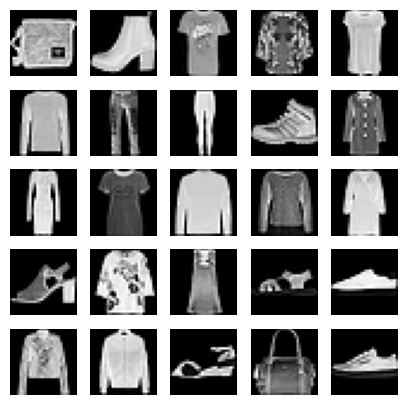

In [3]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("fashion_mnist-samples.png")
plt.close('all')

In [4]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
from keras.utils import to_categorical
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [11]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [12]:
x_train.shape

(60000, 784)

In [13]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45  # overfitting هر بار 45 درصد داده ها را از پروسه آموزش خارج میکنیم، برای جلوگیری از

In [14]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax')) #    و به دلیل چند کلاسه بودن softmax لایه آخر(لایه خروجی) را activation

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

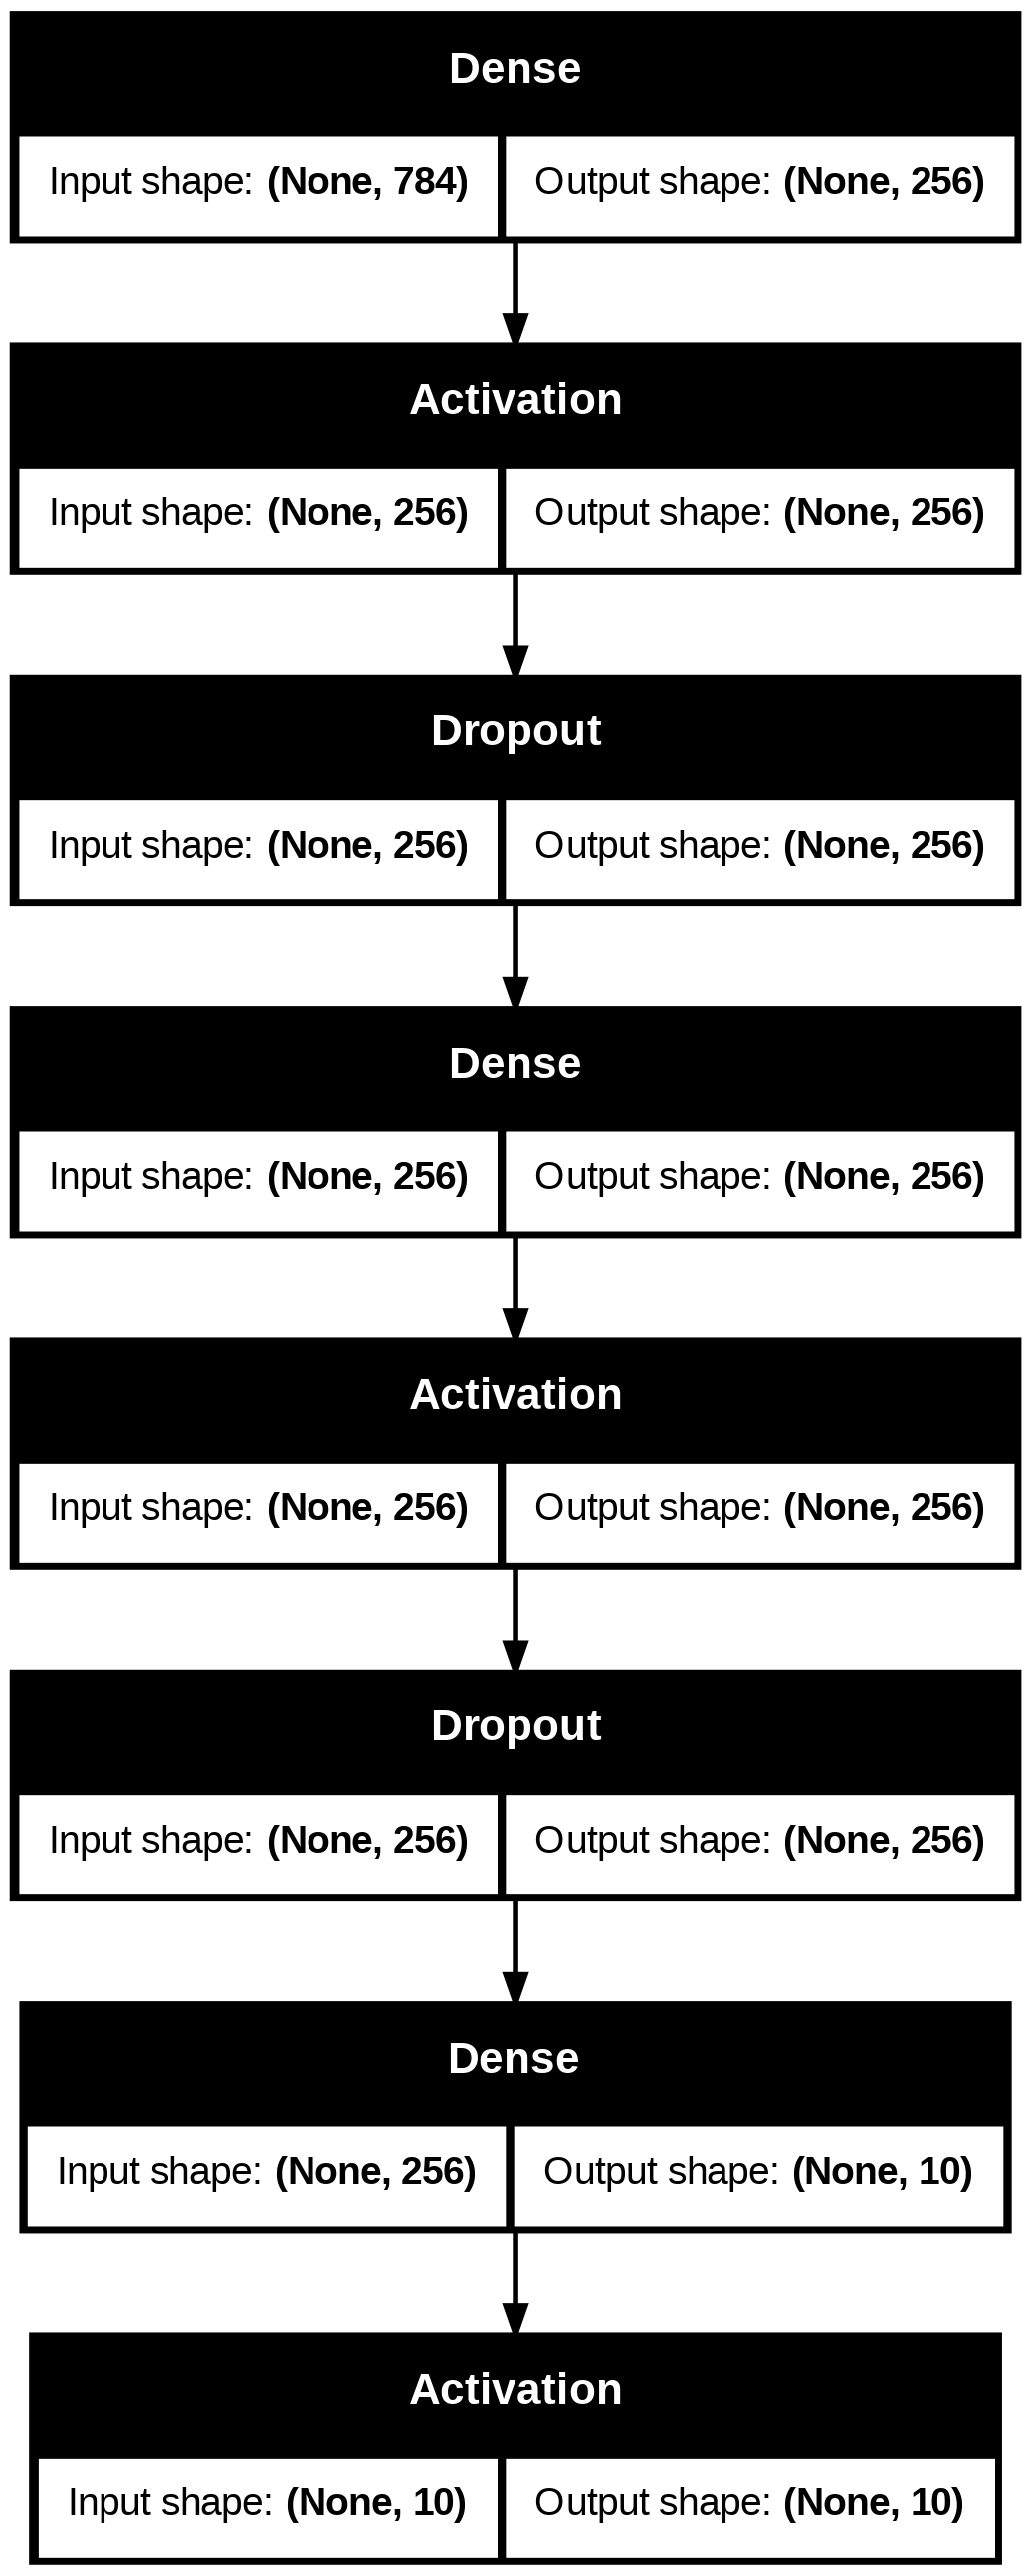

In [16]:
plot_model(model, to_file='mlp-fashion_mnist.png', show_shapes=True)

In [17]:
#Compile the model with compile() method
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
#Train the model with fit() method
history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=30, batch_size=batch_size)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6738 - loss: 0.9020 - val_accuracy: 0.8400 - val_loss: 0.4434
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8292 - loss: 0.4812 - val_accuracy: 0.8485 - val_loss: 0.4144
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8421 - loss: 0.4340 - val_accuracy: 0.8580 - val_loss: 0.3873
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8538 - loss: 0.4030 - val_accuracy: 0.8662 - val_loss: 0.3684
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8591 - loss: 0.3898 - val_accuracy: 0.8634 - val_loss: 0.3764
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8623 - loss: 0.3734 - val_accuracy: 0.8658 - val_loss: 0.3642
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8686 - loss: 0.3585 - val_accuracy: 0.8728 - val_loss: 0.3504
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8692 - loss: 0.3508 - val_accura

In [19]:
def plot_graphs(history, string):
    pyplot.plot(history.history[string])
    pyplot.plot(history.history['val_'+string])
    pyplot.xlabel("Epochs")
    pyplot.ylabel(string)
    pyplot.legend([string, 'val_'+string])
    pyplot.show()

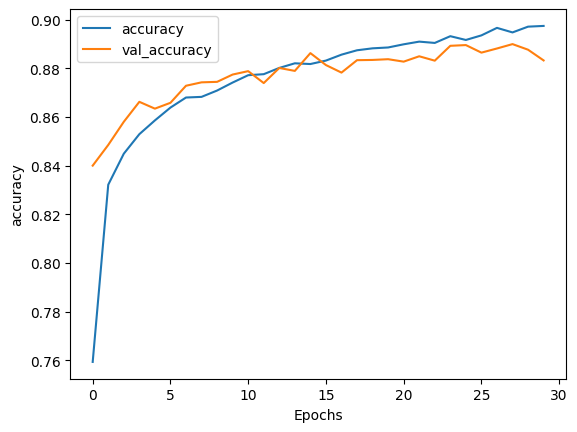

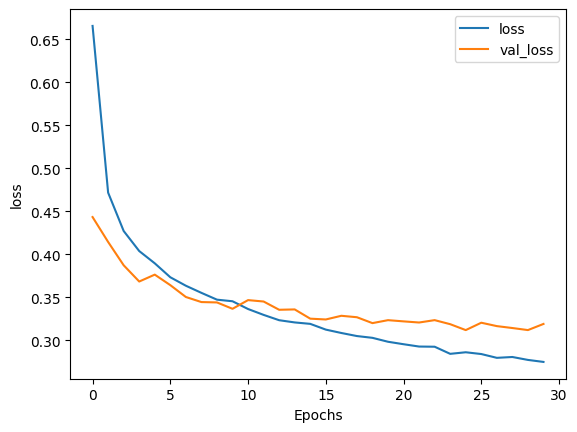

In [20]:
from matplotlib import pyplot
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [21]:
#Evaluating model performance with evaluate() method
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8855 - loss: 0.3179

Test accuracy: 88.3%


In [22]:
predictions = model.predict(x_test, batch_size=batch_size)
predictions

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[1.6604269e-10, 3.8293083e-10, 7.9362100e-11, ..., 1.7952481e-03,
        1.8448089e-10, 9.9813229e-01],
       [1.1198989e-05, 3.3474276e-10, 9.7298467e-01, ..., 4.1416553e-15,
        7.3093070e-10, 3.4780328e-14],
       [2.6359430e-17, 9.9999994e-01, 2.7213133e-21, ..., 3.9439493e-34,
        1.7730701e-21, 2.0313528e-30],
       ...,
       [3.8206112e-05, 1.9697534e-10, 1.9907388e-06, ..., 1.4425706e-07,
        9.9989682e-01, 1.5359478e-11],
       [2.8921830e-15, 9.9999994e-01, 3.1927399e-18, ..., 7.5170403e-25,
        9.7175008e-17, 1.4632015e-22],
       [3.1635991e-06, 1.3063387e-09, 9.5310270e-08, ..., 1.7064865e-03,
        6.8524918e-05, 2.9760870e-06]], dtype=float32)

In [23]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
predictions = model.predict(x_test, batch_size=batch_size)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
true_classes

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([9, 2, 1, ..., 8, 1, 5])

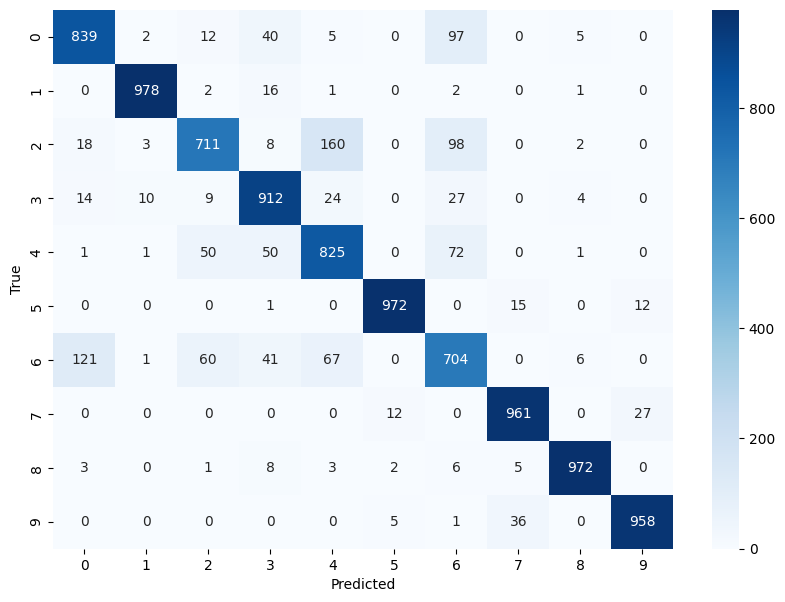

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(true_classes, predicted_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [26]:
from sklearn.metrics import classification_report
report = classification_report(true_classes, predicted_classes)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.84      0.71      0.77      1000
           3       0.85      0.91      0.88      1000
           4       0.76      0.82      0.79      1000
           5       0.98      0.97      0.98      1000
           6       0.70      0.70      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



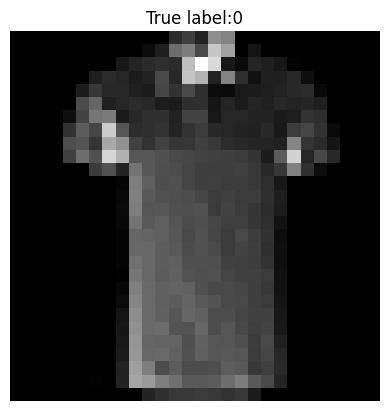

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted class:0


In [27]:
# select one random shape from test data & show that
index = np.random.randint(0,x_test.shape[0])
image = x_test[index]
true_label = np.argmax(y_test[index])
# show picture
plt.imshow(image.reshape(28,28), cmap='gray')
plt.title(f"True label:{true_label}")
plt.axis('off')
plt.show()

# predict with model
image_input = image.reshape(1,-1)     # shaping for input of model
prediction = model.predict(image_input)
predicted_class = np.argmax(prediction)

# print of predicted class
print(f"Predicted class:{predicted_class}")


In [28]:
#label of class in Fashion_MNIST
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

print(f"Predicted label:{class_names[predicted_class]}")
print(f"True label:{class_names[true_label]}")

Predicted label:T-shirt/top
True label:T-shirt/top
